In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from netCDF4 import Dataset, default_fillvals

from PyCESM.vars.cesmslice import CESMDataSlice

In [3]:
import PySCRIP as scrip
from PySCRIP import _scrip
from PySCRIP.config import PySCRIPConfig
from PySCRIP.remap import __special__get_remap_data_to_ll1_grid

In [5]:
# ncfile = Dataset("/Users/dchandan/Volumes/Scinet/reserved/cesm/cesmL2data/PlioMIP_Eoi400_N/ocn/PlioMIP_Eoi400_N.tseries.SSH.nc", "r")
ncfile = Dataset("/Users/dchandan/Research/LGM_sims/LGM21ka~cesmi6gafv1-1701/LGM21ka~cesmi6gafv1-1701.climatology.0801-0830.nc", "r")
sshdata = ncfile["ocn/SSH"][:,:]
ncfile.close()

In [14]:
a = PySCRIPConfig()
map_ = a.getmap("LGM21ka~cesmi6gafv1-1701", "conservative", "gx1", "ll1")

In [15]:
plotdata = scrip.remap(sshdata, map_.fname, map_.format)

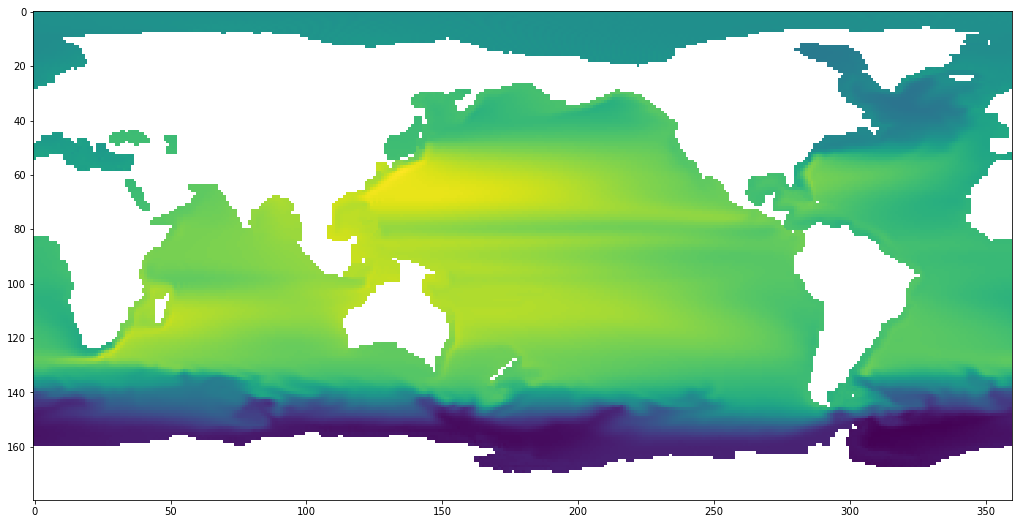

In [18]:
plt.figure(figsize=(18,9))
plt.imshow(np.flipud(np.ma.masked_where(plotdata==0, plotdata)))

In [30]:
ncfile = Dataset("/Users/dchandan/Research/CESM/mapping/cmask_LGM6A.nc", "r")
mask = ncfile.variables["mask"][:,:]
ncfile.close()

plotdata2 = np.copy(plotdata)
# plotdata2[plotdata == 0] = -200

plotdata_cmask = np.ma.MaskedArray(plotdata, mask=mask)

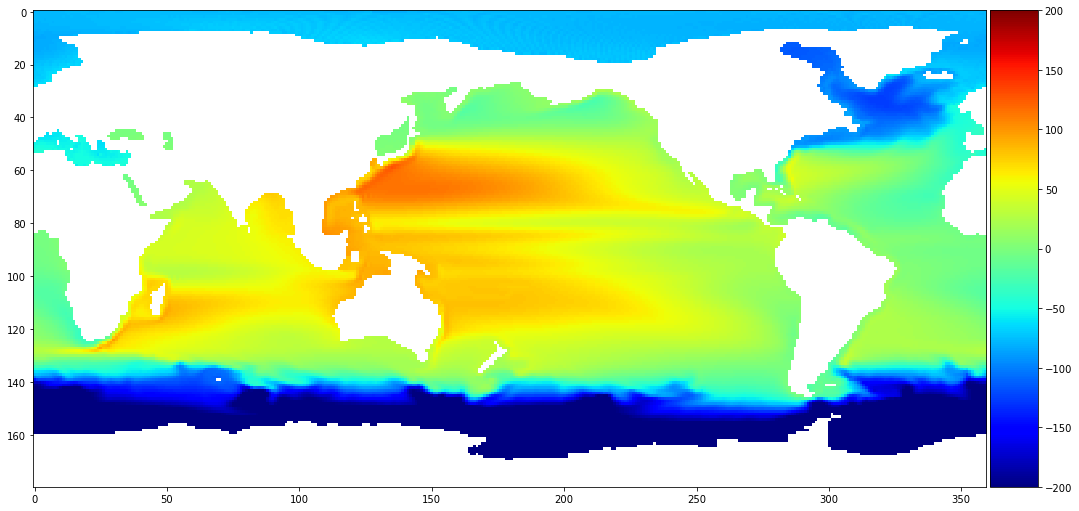

In [31]:
plt.figure(figsize=(18,9))
ax = plt.gca()
im = ax.imshow(np.flipud(plotdata_cmask), cmap=mpl.cm.jet, vmin=-200, vmax=200)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()